# Imports

In [11]:
import xarray as xr
import numpy as np

import matplotlib.pyplot as plt

## OLR

In [2]:
path = '/scratch/06040/tg853394/tc/output/redux/maria/ctl/azim_OLR_0-144hr.nc'

In [5]:
data = xr.open_dataset(path)

In [6]:
data

<xarray.Dataset>
Dimensions:  (azmiuth: 360, level: 1, radius: 433, time: 145)
Coordinates:
  * radius   (radius) float32 0.0 3.0023096 6.004619 ... 1293.9954 1296.9977
  * azmiuth  (azmiuth) float32 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
Dimensions without coordinates: level, time
Data variables:
    OLR      (time, level, azmiuth, radius) float32 ...

In [7]:
data.OLR

<xarray.DataArray 'OLR' (time: 145, level: 1, azmiuth: 360, radius: 433)>
[22602600 values with dtype=float32]
Coordinates:
  * radius   (radius) float32 0.0 3.0023096 6.004619 ... 1293.9954 1296.9977
  * azmiuth  (azmiuth) float32 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
Dimensions without coordinates: time, level

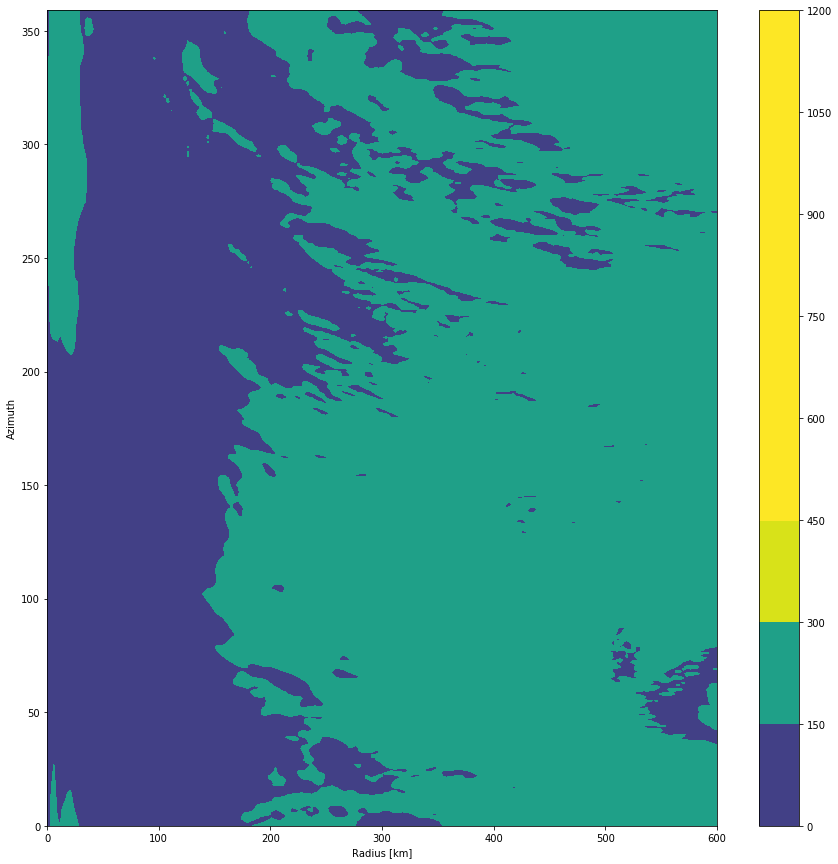

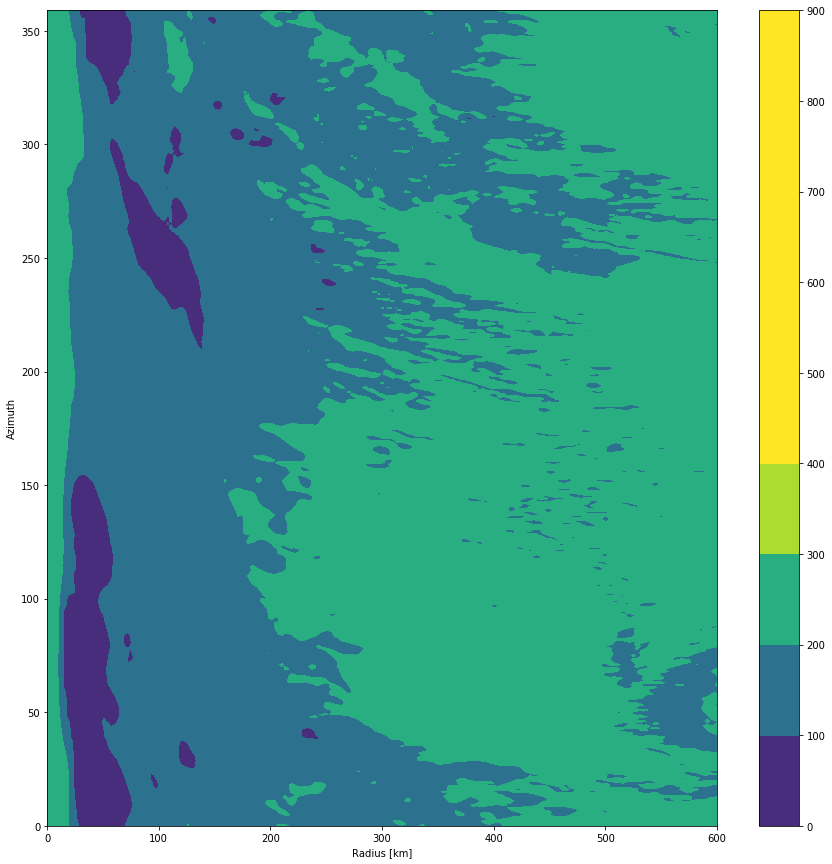

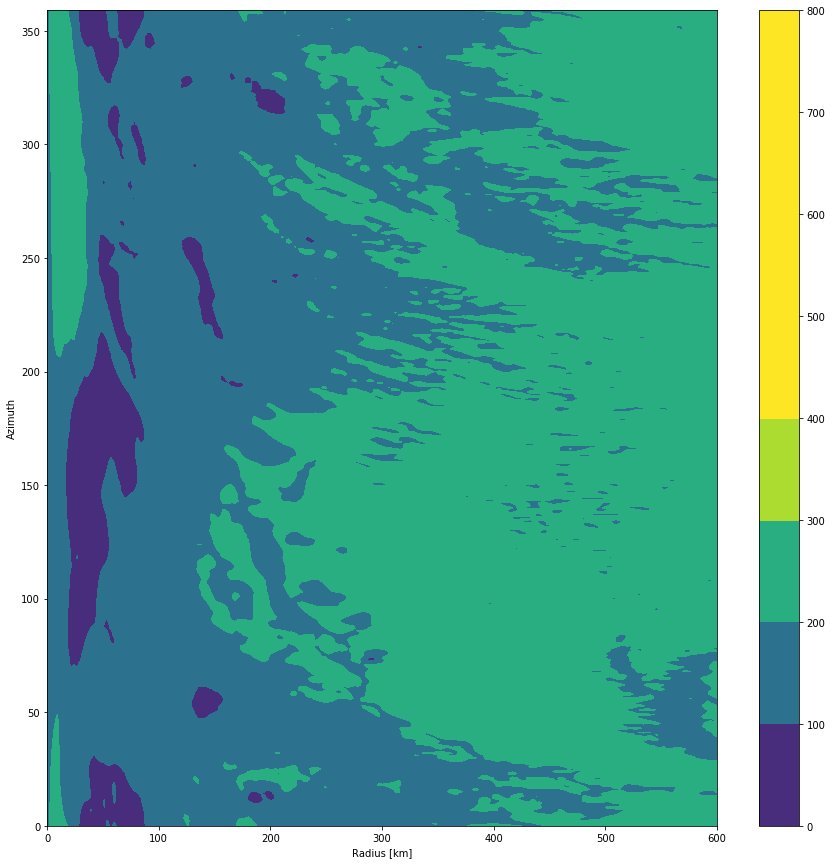

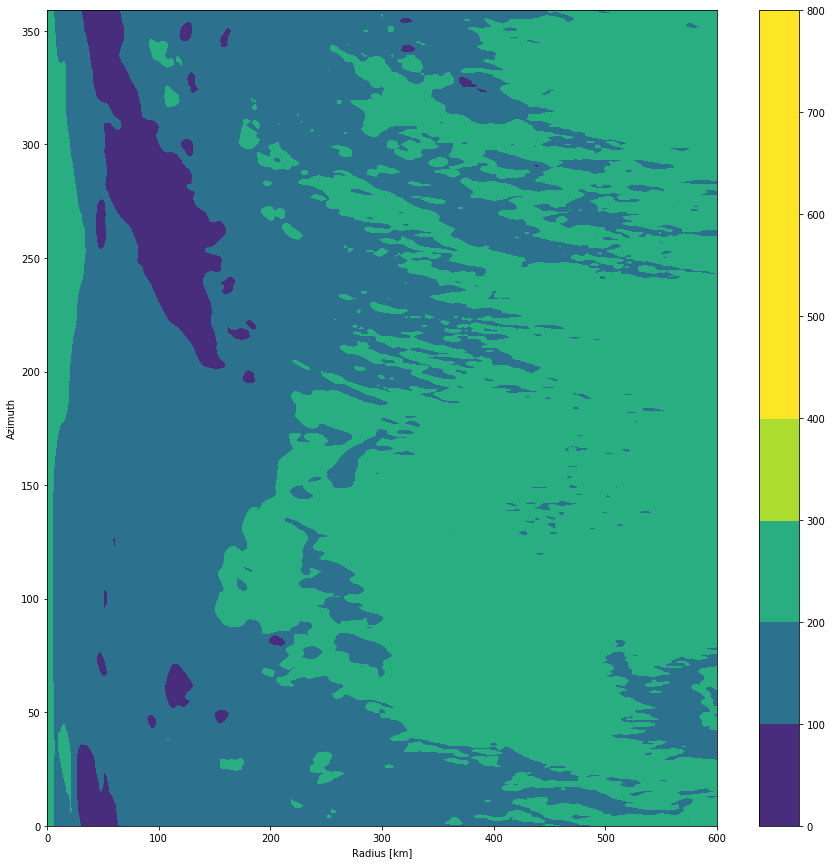

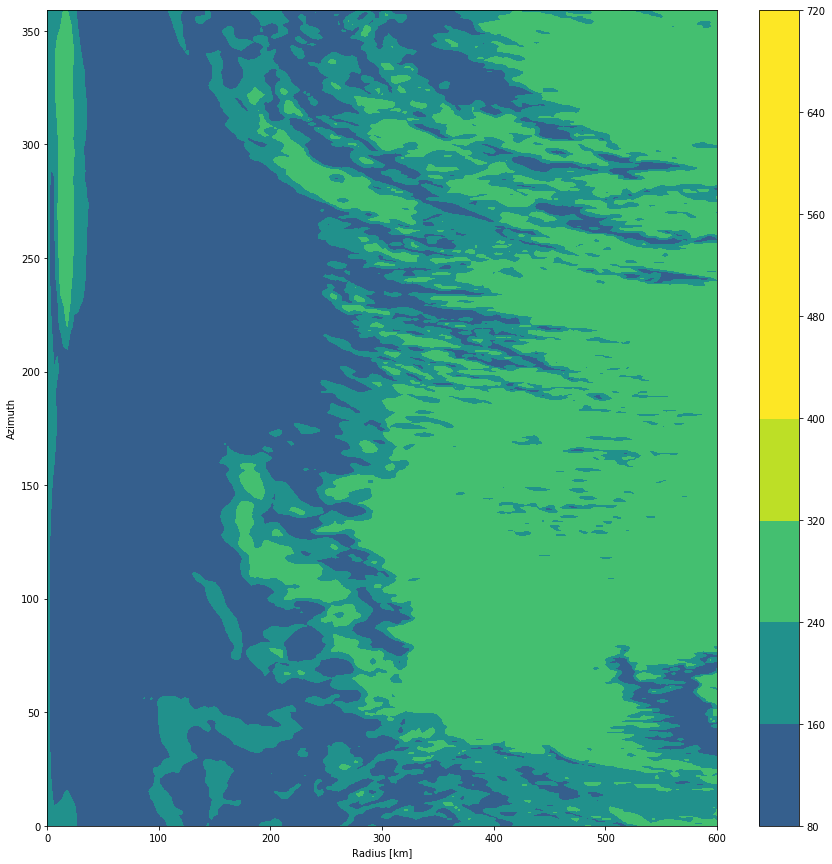

In [25]:
for i in range(5):
    plt.figure(figsize=(15,15))
    plt.contourf(data.radius.values,data.azmiuth.values,data.OLR[120+i,0,:,:].values,vmin=0,vmax=400)
    plt.colorbar()
    plt.xlabel('Radius [km]')
    plt.xlim((0,600))
    plt.ylabel('Azimuth')

## Horizontal velocities

wdir = atan( v / u ) / d2r
 loc_neg = where(u lt 0)
 wdir[loc_neg] += 180.
 wspd = sqrt( u^2 + v^2 )
 u_rad = wspd * cos( (wdir-azim) * d2r)
 v_tan = wspd * sin( (wdir-azim) * d2r)

d2r = !pi/180.

In [12]:
pathU = '/scratch/06040/tg853394/tc/output/redux/maria/ctl/azim_U10_0-144hr.nc'
pathV = '/scratch/06040/tg853394/tc/output/redux/maria/ctl/azim_V10_0-144hr.nc'

In [13]:
dataU = xr.open_dataset(pathU)
dataV = xr.open_dataset(pathV)

In [14]:
dataU

<xarray.Dataset>
Dimensions:  (azmiuth: 360, level: 1, radius: 433, time: 145)
Coordinates:
  * radius   (radius) float32 0.0 3.0023096 6.004619 ... 1293.9954 1296.9977
  * azmiuth  (azmiuth) float32 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
Dimensions without coordinates: level, time
Data variables:
    U10      (time, level, azmiuth, radius) float32 ...

In [15]:
dataV

<xarray.Dataset>
Dimensions:  (azmiuth: 360, level: 1, radius: 433, time: 145)
Coordinates:
  * radius   (radius) float32 0.0 3.0023096 6.004619 ... 1293.9954 1296.9977
  * azmiuth  (azmiuth) float32 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
Dimensions without coordinates: level, time
Data variables:
    V10      (time, level, azmiuth, radius) float32 ...

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

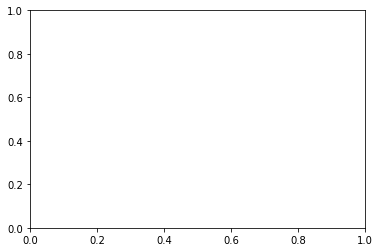

In [34]:
it = 100

X = dataU.radius.values
Y = dataV.azmiuth.values
U = dataU.U10[it,0,:,:].values
U[np.isnan(U)] = 0
V = dataV.V10[it,0,:,:].values
V[np.isnan(V)] = 0

plt.quiver([X, Y], U, V)
#plt.contourf(X,Y,U)
#plt.colorbar()

In [21]:
U

array([[-1.2738916, -6.28286  , -8.117824 , ..., -3.8686385, -3.7671483,
        -3.5033827],
       [-1.2738916, -6.474437 , -8.368032 , ..., -3.86753  , -4.0622935,
        -4.276187 ],
       [-1.2738916, -6.664431 , -8.617298 , ..., -4.656493 , -4.6686325,
        -4.694038 ],
       ...,
       [-1.2738916, -5.9336095, -7.7274246, ..., -3.7241395, -3.5039005,
        -3.4386957],
       [-1.2738916, -6.0514927, -7.8583593, ..., -3.9241014, -4.0302615,
        -4.0753956],
       [-1.2738916, -6.1679235, -7.988508 , ..., -3.870489 , -3.906747 ,
        -3.972261 ]], dtype=float32)

In [30]:
np.sum(np.isnan(V))

0

In [31]:
np.sum(1-np.isfinite(V))

0

## Cloud Radiative Heating

In [42]:
path_coor = '/scratch/06040/tg853394/tc/output/redux/maria/ctl/post/U.nc'
coor = xr.open_dataset(path_coor)

In [43]:
coor

<xarray.Dataset>
Dimensions:  (lat: 750, level: 39, lon: 1248, time: 145)
Dimensions without coordinates: lat, level, lon, time
Data variables:
    pres     (level) float32 ...
    U        (time, level, lat, lon) float32 ...

In [48]:
pathLW = '/scratch/06040/tg853394/tc/output/redux/maria/ctl/azim_RTHRATLW_0-144hr.nc'
pathLW_CS = '/scratch/06040/tg853394/tc/output/redux/maria/ctl/azim_RTHRATLWC_0-144hr.nc'

pathSW = '/scratch/06040/tg853394/tc/output/redux/maria/ctl/azim_RTHRATSW_0-144hr.nc'
pathSW_CS = '/scratch/06040/tg853394/tc/output/redux/maria/ctl/azim_RTHRATSWC_0-144hr.nc'

In [49]:
#dataTOT = xr.open
dataCS = xr.open_dataset(pathLW_CS)

In [50]:
data

<xarray.Dataset>
Dimensions:    (azmiuth: 360, level: 39, radius: 433, time: 145)
Coordinates:
  * radius     (radius) float32 0.0 3.0023096 6.004619 ... 1293.9954 1296.9977
  * azmiuth    (azmiuth) float32 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
Dimensions without coordinates: level, time
Data variables:
    RTHRATLWC  (time, level, azmiuth, radius) float32 ...

In [38]:
CR = data.RTHRATLWC

In [40]:
CR # in K/s

<xarray.DataArray 'RTHRATLWC' (time: 145, level: 39, azmiuth: 360, radius: 433)>
[881501400 values with dtype=float32]
Coordinates:
  * radius   (radius) float32 0.0 3.0023096 6.004619 ... 1293.9954 1296.9977
  * azmiuth  (azmiuth) float32 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
Dimensions without coordinates: time, level

Text(0, 0.5, 'Pressure [hPa]')

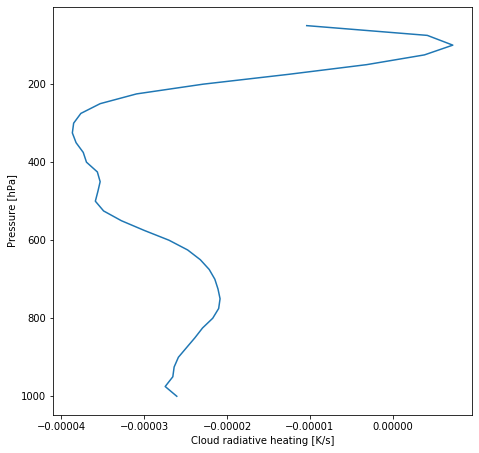

In [47]:
plt.figure(figsize=(7.5,7.5))
plt.plot(CR.mean(axis=(0,2,3)).values,coor.pres)
plt.gca().invert_yaxis()
plt.xlabel('Cloud radiative heating [K/s]')
plt.ylabel('Pressure [hPa]')

## Thermo

In [51]:
pathWV = '/scratch/06040/tg853394/tc/output/redux/maria/ctl/azim_QVAPOR_0-144hr.nc'
pathCWV = '/scratch/06040/tg853394/tc/output/redux/maria/ctl/azim_PW_0-144hr.nc'
pathT = '/scratch/06040/tg853394/tc/output/redux/maria/ctl/azim_T_0-144hr.nc'

In [53]:
data = xr.open_dataset(pathWV)

In [54]:
data

<xarray.Dataset>
Dimensions:  (azmiuth: 360, level: 39, radius: 433, time: 145)
Coordinates:
  * radius   (radius) float32 0.0 3.0023096 6.004619 ... 1293.9954 1296.9977
  * azmiuth  (azmiuth) float32 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
Dimensions without coordinates: level, time
Data variables:
    QVAPOR   (time, level, azmiuth, radius) float32 ...

## Prepare data

Daily (u10,v10,qv,T,lw,sw) -> Intensification rate